# IMPORT OF LIBRAIRIES 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import calendar
from functions import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adrien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# INTRODUCTION

In this section, we will present our procedure to identify the major events related to climate change that took place during the scope of our study.
To simplify our presentation we will focus on the year 2020 but this procedure will be extended to the entire data set later on.
The objective is to identify the date of these events by determining the days where the number of citations related to climate change is the most important.
We have therefore built a preliminary lexicon containing the terms most frequently used by speakers commenting about the climate emergency ( such as "climate change", "COP26",...)
This lexicon is a first draft and will be improved later by a more precise method involving a larger lexicon or a more advanced selection method.
With this lexicon we can filter our data and create a dataframe containing only the climate-related quotations for each year and this reduced dataframes will be used throughout our study.
Every dataframes and methodology to construct them can be found in notebook "Playground"

In this notebook we use only the dataframe for the year 2020

After building these dataframe, we can identify the days where the number of quotes related to climate is the most important.
Finally, we can identify the most frequently used words by the speakers and thus try to determine if a significant event took place on the day of this peak in the number of quotations



### LOADING DATA SET FOR THE YEAR 2020

In [2]:
quotes_2020 = pd.io.json.read_json('quotes-2020_climate.json.bz2', lines = True)

### Creation of a column containing the month when the month when the quote was reported


In [3]:
quotes_2020['month'] = quotes_2020['date'].dt.month.apply(lambda x: calendar.month_abbr[x])   
quotes_2020

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,nationality,gender,ethnic_group,occupation,party,religion,date_of_birth,month
0,2020-02-27-004325,And it's also in the context of decades of utt...,None,[],2020-02-27 15:17:36,1,"[[None, 0.8786], [Bernie Sanders, 0.1214]]",[http://www.eenews.net/stories/1062457547],E,Thursday,None,None,None,None,None,None,NaN,Feb
1,2020-01-29-062975,Many make the link today between their experie...,Peter Maurer,"[Q117796, Q42426597]",2020-01-29 09:04:36,5,"[[Peter Maurer, 0.8787], [None, 0.1213]]",[http://whbl.com/news/articles/2020/jan/29/hun...,E,Wednesday,None,None,None,None,None,None,NaN,Jan
2,2020-02-10-076321,the National Energy and Climate Plans are how ...,Kadri Simson,[Q13570003],2020-02-10 05:51:51,1,"[[Kadri Simson, 0.9269], [None, 0.0504], [Gret...",[https://www.politico.eu/newsletter/brussels-p...,E,Monday,Estonia,female,None,politician,Estonian Centre Party,None,+1977-01-22T00:00:00Z,Feb
3,2020-01-06-069057,"This budget also allows us to earmark £ 500,00...",John Whitehead,"[Q55436000, Q58150131, Q6263827, Q6263833, Q62...",2020-01-06 11:49:00,1,"[[John Whitehead, 0.7971], [None, 0.2029]]",[https://www.buryfreepress.co.uk/news/draft-bu...,E,Monday,None,None,None,None,None,None,NaN,Jan
4,2020-03-10-005294,"As a state, we will pursue every option availa...",Kate Brown,"[Q16727692, Q6375399]",2020-03-10 20:47:28,2,"[[Kate Brown, 0.7275], [None, 0.2726]]",[http://www.courthousenews.com/oregon-governor...,E,Tuesday,None,None,None,None,None,None,NaN,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10221,2020-02-05-114487,We will be an energetic champion of free trade...,Dominic Raab,[Q268584],2020-02-05 16:30:31,2,"[[Dominic Raab, 0.8813], [None, 0.0998], [Geor...",[http://forbesadvocate.com.au/story/6616761/au...,E,Wednesday,United Kingdom,male,None,"[politician, lawyer]",Conservative Party,None,+1974-02-25T00:00:00Z,Feb
10222,2020-02-21-007763,Both urgent and long-term actions are needed t...,None,[],2020-02-21 20:23:47,1,"[[None, 0.7482], [Greta Thunberg, 0.2518]]",[http://feeds.inquisitr.com/~r/google/yDYq/~3/...,E,Friday,None,None,None,None,None,None,NaN,Feb
10223,2020-04-10-020959,If we re-elect Donald Trump because we have tu...,None,[],2020-04-10 00:00:00,1,"[[None, 0.5234], [Mike Doyle, 0.4509], [Jim Bu...",[http://wesa.fm/post/mike-doyle-face-progressi...,E,Friday,None,None,None,None,None,None,NaN,Apr
10224,2020-02-10-057505,"Obama got health care, Trump got his tax cut, ...",Tom Steyer,[Q16189531],2020-02-10 11:00:08,1,"[[Tom Steyer, 0.8143], [None, 0.1857]]",[https://thebulletin.org/2020/02/on-the-new-ha...,E,Monday,United States of America,male,None,"[businessperson, organizational founder, phila...",Democratic Party,None,+1957-06-27T00:00:00Z,Feb


In [4]:
quotes_2020['date'] = quotes_2020['date'].dt.date

### Here create a serie containing the number of quotations per day in descending order 

In [5]:
quotes_date_occurence = quotes_2020.groupby('date').date.count()
quotes_date_occurence = quotes_date_occurence.sort_values(ascending= False)
quotes_date_occurence.head(5)

date
2020-01-14    248
2020-01-15    228
2020-01-21    221
2020-02-06    219
2020-02-07    213
Name: date, dtype: int64

### We then select  the quotations reported on peak days 

In [6]:
top_ten_days = quotes_date_occurence.index[:10].astype(str)
quotations_peak  = quotes_2020[quotes_2020['date'].astype(str).apply(lambda x: x in top_ten_days.to_list())]

## Plot of the number of quotations reported per day 

Text(0.5, 1.0, 'Number of quotations reported per day ')

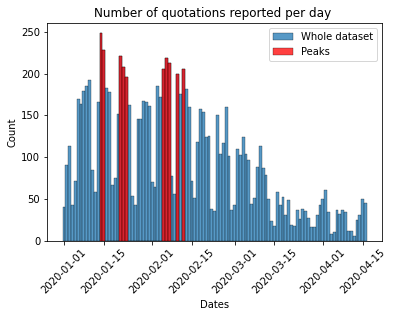

In [7]:
sns.histplot(quotes_2020['date'], bins = len(quotes_date_occurence), label = "Whole dataset")
sns.histplot(quotations_peak['date'], color = 'red', label = "Peaks") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()
plt.title('Number of quotations reported per day ')


## Plot of the quotations reported per month

Text(-2.700000000000003, 0.5, 'Count')

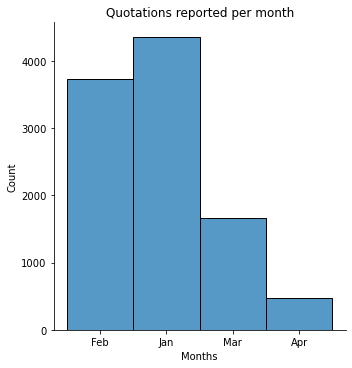

In [8]:
sns.displot(quotes_2020['month'])
plt.title('Quotations reported per month')
plt.xlabel("Months")
plt.ylabel("Count")

##  Identification of  the most frequently used words by the speakers when the peak occured

The goal here is to observe the most frequent words, and see if we can establish a link to a particular event.


## First we will look at the frequency of  words starting with a capital letter 

We do this in order to to find more easily the countries where these major events occured or the names of some  people.
These words can be very useful keywords.

In [9]:
key_capital_words = []
top_ten_days = quotes_date_occurence.index[:10].astype(str)
for d in top_ten_days:
    _, capital_words = capital_letter_keywords(quotes_2020, d)
    key_capital_words.append(capital_words)


 We show in the following dataframe, the most frequent keywords starting with a capital letter for the 10 days where quotations on climate change were predominant.

In [10]:
top_ten_day_key_words_capital = pd.DataFrame(key_capital_words, index = quotes_date_occurence.index[:10]).fillna(0)
top_ten_day_key_words_capital

,Australia,BlackRock,Minister,Canada,UK,Government,Michaels,COP26,BP,Glasgow,Scottish,Greta,Britain,Trump
date,,,,,,,,,,,,,,
2020-01-14,21.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-15,13.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-06,0.0,0.0,0.0,0.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-07,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12,0.0,0.0,0.0,0.0,14.0,8.0,0.0,12.0,8.0,8.0,7.0,0.0,0.0,0.0
2020-02-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0,7.0,0.0


Next we look at the frequency of all words.

 This time, we show in the following dataframe, the most frequent keywords for the 10 days where quotations on climate change were predominant.

In [11]:
keywords = []
top_ten_days = quotes_date_occurence.index[:10].astype(str)
for d in top_ten_days:
    _, words = all_keywords(quotes_2020, d)
    keywords.append(words)

In [12]:
top_ten_day_keywords = pd.DataFrame(keywords, index = quotes_date_occurence.index[:10]).fillna(0)
top_ten_day_keywords

,people,Australia,need,around,fire,impacts,country,much,economy,energy,...,COP26,communities,health,life,already,would,year,nuclear,state,political
date,,,,,,,,,,,,,,,,,,,,,
2020-01-14,26.0,21.0,17.0,16.0,15.0,15.0,14.0,14.0,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-15,21.0,13.0,14.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,22.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-06,15.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-07,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,21.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-05,18.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12,18.0,0.0,33.0,0.0,0.0,0.0,11.0,0.0,0.0,25.0,...,12.0,12.0,11.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0
2020-02-10,26.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0


From the different results, we see that "Australia" and "fire" are amidst the most frequent words
on the 14th of January.

This indicates that the event that "boosted" the number of quotes about the climate during this time is probably the big australian wildfires that began at the end of 2019. We should explore this option now.


##  We therefore explore what happened on the 14th of  january...

The most important peak occured on the 14th of January. 

We will then, try to determine if a particular event occured.

In [13]:
filtered_sentence_df_australia,count_capital_keywords_australia =  capital_letter_keywords(
    quotes_2020, '2020-01-14')
_,count_keywords_australia = all_keywords(quotes_2020, '2020-01-14' )


In [14]:
count_capital_keywords_australia

Australia    21
BlackRock    11
dtype: int64

In [15]:
count_keywords_australia 

people       26
Australia    21
need         17
around       16
fire         15
impacts      15
country      14
much         14
economy      13
energy       13
emergency    13
address      13
dtype: int64

From these previous results, evidences accumulate on the nature of this peak. In order to validate it with a manual manipulation, we try to look for the word "bushfire" on this date here below. We observe 14 occurences. This is way too specific to be a coincidence.

In [16]:
filtered_sentence_df_australia.str.contains('bushfire').sum()

14

This link from this precise period validates our expectation : https://edition.cnn.com/2020/01/01/australia/australia-fires-explainer-intl-hnk-scli/index.html

In [17]:

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Other NLP
import re
import spacy

from nltk.corpus import stopwords

# General Plotting
import matplotlib.pyplot as plt
 
import seaborn as sns


# Special Plotting
import pyLDAvis
import pyLDAvis.gensim_models 

# ignore some warnings 
import warnings
warnings.filterwarnings('ignore')

# Set the maximum number of rows displayed by pandas
pd.options.display.max_rows = 1000

# Set some CONSTANTS that will be used later
SEED    = 41  # base to generate a random number


### Australia

In [18]:
australia = quotations_peak[quotations_peak.date.astype(str) =='2020-01-14']

In [19]:
! python -m spacy download en_core_web_sm

  Using cached en_core_web_sm-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [20]:
spacy.load('en_core_web_sm')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
def preprocess(txt):
    txt = " ".join(simple_preprocess(txt))
    
    
    
    return txt


In [22]:
australia['quotation'] = australia['quotation'].apply(lambda x : preprocess(x))

In [23]:

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/adrien/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
def lemmatize_text(txt):
    word_tokens = word_tokenize(txt)
    lemmatized_output = [WordNetLemmatizer().lemmatize(w) for w in word_tokens ]
    
    
    return lemmatized_output

In [25]:
australia['quotation'] = australia['quotation'].apply(lambda x : lemmatize_text(x))


In [26]:
# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

dictionary = corpora.Dictionary(australia['quotation'])

In [27]:
#Filter out tokens that appear in
#less than 15 documents (absolute number) or
#more than 0.5 documents (fraction of total corpus size, not absolute number).
#after the above two steps, keep only the first 100000 most frequent tokens.

dictionary.filter_extremes(no_below = 5, no_above=0.1, keep_n= 200)

## Gensim doc2bow

In [28]:
#For each document we create a dictionary reporting how many
#words and how many times those words appear. Save this to ‘bow_corpus’, 
#then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(q) for q in australia['quotation']]
bow_corpus[12] #(token id, token count for document 12)

[(0, 1), (34, 1), (43, 1), (66, 1), (67, 1), (68, 1), (69, 1)]

### LDA model

In [29]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics= 10, id2word=dictionary, passes=2, workers = 2)

 ## Visualization of the top keywwords for each model (topics)

In [30]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.034*"all" + 0.033*"one" + 0.021*"impact" + 0.021*"their" + 0.021*"who" + 0.020*"challenge" + 0.020*"time" + 0.019*"emergency" + 0.018*"energy" + 0.016*"those"
Topic: 1 
Words: 0.063*"fire" + 0.035*"just" + 0.034*"increase" + 0.033*"risk" + 0.033*"how" + 0.025*"help" + 0.024*"evidence" + 0.023*"over" + 0.023*"high" + 0.022*"family"
Topic: 2 
Words: 0.031*"u" + 0.026*"what" + 0.024*"all" + 0.024*"more" + 0.020*"re" + 0.019*"than" + 0.017*"these" + 0.017*"when" + 0.016*"thing" + 0.016*"because"
Topic: 3 
Words: 0.036*"government" + 0.031*"impact" + 0.030*"new" + 0.029*"blackrock" + 0.028*"economy" + 0.027*"australian" + 0.025*"risk" + 0.024*"demand" + 0.024*"action" + 0.022*"including"
Topic: 4 
Words: 0.030*"risk" + 0.028*"year" + 0.025*"there" + 0.021*"so" + 0.019*"company" + 0.019*"more" + 0.018*"crisis" + 0.017*"an" + 0.017*"fire" + 0.016*"life"
Topic: 5 
Words: 0.037*"you" + 0.027*"if" + 0.027*"environmental" + 0.025*"even" + 0.022*"more" + 0.021*"impact" + 0.020*"

In [31]:
cm = CoherenceModel(model=lda_model, texts = australia['quotation'], dictionary = dictionary, coherence = 'c_v')
coherence = cm.get_coherence()  # get coherence value
print("The average coherence score for all the topics is ",coherence)

The average coherence score for all the topics is  0.3742221671553719


In [32]:
# Visualize topics-keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.094881 -0.028723       1        1  14.845177
9      0.007991  0.088491       2        1  12.413020
0      0.031917 -0.100597       3        1  12.321299
4      0.044356 -0.040712       4        1  12.320724
6     -0.098279  0.154547       5        1  10.847150
5     -0.053627 -0.044932       6        1   8.726417
3      0.168803  0.026461       7        1   8.006842
7     -0.028541 -0.057283       8        1   7.481139
8     -0.069083 -0.049933       9        1   6.837114
1      0.091346  0.052681      10        1   6.201117, topic_info=              Term       Freq      Total Category  logprob  loglift
20             you  19.000000  19.000000  Default  30.0000  30.0000
40            fire  25.000000  25.000000  Default  29.0000  29.0000
180            way  13.000000  13.000000  Default  28.0000  28.0000
63            risk  19.000000  19.000000  Default  27.0000  27.0000
183             ha  26.000000  26.000000  Default  26.0000  26.0000
78          impact  22.000000  22.000000  Default  25.0000  25.0000
23           issue  15.000000  15.000000  Default  24.0000  24.0000
13             how  22.000000  22.000000  Default  23.0000  23.0000
91             doe  13.000000  13.000000  Default  22.0000  22.0000
147     australian   9.000000   9.000000  Default  21.0000  21.0000
39             all  22.000000  22.000000  Default  20.0000  20.0000
197       increase   9.000000   9.000000  Default  19.0000  19.0000
21       australia  20.000000  20.000000  Default  18.0000  18.0000
48      government  14.000000  14.000000  Default  17.0000  17.0000
38            very  18.000000  18.000000  Default  16.0000  16.0000
111           just  11.000000  11.000000  Default  15.0000  15.0000
93            much  13.000000  13.000000  Default  14.0000  14.0000
22       blackrock  10.000000  10.000000  Default  13.0000  13.0000
101           more  31.000000  31.000000  Default  12.0000  12.0000
94              so  20.000000  20.000000  Default  11.0000  11.0000
175          ocean  10.000000  10.000000  Default  10.0000  10.0000
92              he  12.000000  12.000000  Default   9.0000   9.0000
80             one  20.000000  20.000000  Default   8.0000   8.0000
196    temperature  10.000000  10.000000  Default   7.0000   7.0000
87         economy  12.000000  12.000000  Default   6.0000   6.0000
118         within   9.000000   9.000000  Default   5.0000   5.0000
85       including  10.000000  10.000000  Default   4.0000   4.0000
145       evidence  11.000000  11.000000  Default   3.0000   3.0000
156            new  13.000000  13.000000  Default   2.0000   2.0000
181  environmental  12.000000  12.000000  Default   1.0000   1.0000
126         saying   4.170296   6.547247   Topic1  -4.2783   1.4564
125             re   6.050356  10.059232   Topic1  -3.9062   1.3991
193         become   3.363152   5.672231   Topic1  -4.4934   1.3848
68      individual   3.368191   6.411447   Topic1  -4.4919   1.2638
67         greater   2.961897   5.699518   Topic1  -4.6205   1.2529
89            home   3.658923   7.457114   Topic1  -4.4092   1.1955
158           term   4.615846   9.661337   Topic1  -4.1768   1.1689
129             ve   3.560455   7.458188   Topic1  -4.4364   1.1681
6            thing   4.881965  10.293841   Topic1  -4.1208   1.1615
90            mean   2.561493   5.451855   Topic1  -4.7657   1.1521
116           when   5.221800  11.167280   Topic1  -4.0535   1.1473
37               u   9.405156  20.807976   Topic1  -3.4651   1.1134
69          severe   2.662870   6.109136   Topic1  -4.7269   1.0771
122          going   4.440210  10.575091   Topic1  -4.2156   1.0397
127           than   5.751959  14.134016   Topic1  -3.9568   1.0085
81           these   5.227823  12.996573   Topic1  -4.0523   0.9968
121         future   3.583490   9.035300   Topic1  -4.4300   0.9827
52            what   7.691377  19.553647   To

### Cop 26

In [33]:
cop = quotations_peak[quotations_peak.date.astype(str) =='2020-02-12']

In [34]:
def preprocess(txt):
    txt = " ".join(simple_preprocess(txt))
    
    
    
    return txt


In [35]:
cop['quotation'] = cop['quotation'].apply(lambda x : preprocess(x))

In [36]:
def lemmatize_text(txt):
    word_tokens = word_tokenize(txt)
    lemmatized_output = [WordNetLemmatizer().lemmatize(w) for w in word_tokens ]
    
    
    return lemmatized_output

In [37]:
cop['quotation'] = cop['quotation'].apply(lambda x : lemmatize_text(x))


In [38]:
# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

dictionary = corpora.Dictionary(cop['quotation'])

In [39]:
#Filter out tokens that appear in
#less than 15 documents (absolute number) or
#more than 0.5 documents (fraction of total corpus size, not absolute number).
#after the above two steps, keep only the first 100000 most frequent tokens.

dictionary.filter_extremes(no_below = 5, no_above=0.1, keep_n= 200)

## Gensim doc2bow

In [40]:
#For each document we create a dictionary reporting how many
#words and how many times those words appear. Save this to ‘bow_corpus’, 
#then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(q) for q in cop['quotation']]
bow_corpus[12] #(token id, token count for document 12)

[(14, 1), (44, 1), (81, 1), (82, 1), (83, 1), (84, 1)]

### LDA model

In [41]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics= 10, id2word=dictionary, passes=2, workers = 2)

 ## Visualization of the top keywwords for each model (topics)

In [42]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.029*"now" + 0.023*"so" + 0.022*"technology" + 0.018*"life" + 0.018*"at" + 0.018*"he" + 0.018*"health" + 0.018*"can" + 0.017*"when" + 0.017*"time"
Topic: 1 
Words: 0.038*"energy" + 0.038*"these" + 0.038*"ha" + 0.037*"issue" + 0.030*"policy" + 0.028*"work" + 0.027*"been" + 0.022*"warming" + 0.021*"recent" + 0.019*"can"
Topic: 2 
Words: 0.029*"state" + 0.026*"energy" + 0.021*"environmental" + 0.019*"they" + 0.019*"their" + 0.017*"my" + 0.016*"warming" + 0.016*"fuel" + 0.016*"most" + 0.015*"country"
Topic: 3 
Words: 0.028*"how" + 0.028*"work" + 0.025*"do" + 0.021*"address" + 0.019*"take" + 0.017*"u" + 0.017*"issue" + 0.017*"all" + 0.016*"president" + 0.016*"action"
Topic: 4 
Words: 0.038*"way" + 0.031*"they" + 0.026*"community" + 0.025*"which" + 0.024*"economy" + 0.023*"fight" + 0.023*"or" + 0.019*"there" + 0.017*"temperature" + 0.016*"new"
Topic: 5 
Words: 0.039*"one" + 0.028*"policy" + 0.028*"re" + 0.027*"who" + 0.025*"government" + 0.022*"would" + 0.022*"they" + 0.021

In [43]:
cm = CoherenceModel(model=lda_model, texts = cop['quotation'], dictionary = dictionary, coherence = 'c_v')
coherence = cm.get_coherence()  # get coherence value
print("The average coherence score for all the topics is ",coherence)

The average coherence score for all the topics is  0.33940357039600455


In [44]:
# Visualize topics-keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.060140  0.094467       1        1  12.743791
3      0.005266 -0.001231       2        1  12.234370
4      0.066254 -0.005176       3        1  11.489609
7      0.123627 -0.082172       4        1  10.588838
9     -0.003533 -0.126493       5        1  10.341968
8     -0.002584 -0.009060       6        1   9.851022
0     -0.127617 -0.010567       7        1   9.544877
1      0.000173  0.099426       8        1   8.929030
6     -0.125293 -0.037326       9        1   7.803446
5      0.123847  0.078132      10        1   6.473050, topic_info=              Term       Freq      Total Category  logprob  loglift
55      government  21.000000  21.000000  Default  30.0000  30.0000
124  environmental  12.000000  12.000000  Default  29.0000  29.0000
40            work  22.000000  22.000000  Default  28.0000  28.0000
50             way  17.000000  17.000000  Default  27.0000  27.0000
19             one  13.000000  13.000000  Default  26.0000  26.0000
13              ha  22.000000  22.000000  Default  25.0000  25.0000
38              my  13.000000  13.000000  Default  24.0000  24.0000
146             so  17.000000  17.000000  Default  23.0000  23.0000
25           these  21.000000  21.000000  Default  22.0000  22.0000
149           real  11.000000  11.000000  Default  21.0000  21.0000
14           issue  18.000000  18.000000  Default  20.0000  20.0000
133          thing   9.000000   9.000000  Default  19.0000  19.0000
53             cop  12.000000  12.000000  Default  18.0000  18.0000
168          water   7.000000   7.000000  Default  17.0000  17.0000
12          energy  27.000000  27.000000  Default  16.0000  16.0000
164           want  16.000000  16.000000  Default  15.0000  15.0000
54         glasgow   8.000000   8.000000  Default  14.0000  14.0000
3           policy  17.000000  17.000000  Default  13.0000  13.0000
39              re  11.000000  11.000000  Default  12.0000  12.0000
106            who   9.000000   9.000000  Default  11.0000  11.0000
47            been  15.000000  15.000000  Default  10.0000  10.0000
31             how  12.000000  12.000000  Default   9.0000   9.0000
122           area   8.000000   8.000000  Default   8.0000   8.0000
114          state  13.000000  13.000000  Default   7.0000   7.0000
51            year  19.000000  19.000000  Default   6.0000   6.0000
41       community  13.000000  13.000000  Default   5.0000   5.0000
98            when  11.000000  11.000000  Default   4.0000   4.0000
85         already  10.000000  10.000000  Default   3.0000   3.0000
178       solution   7.000000   7.000000  Default   2.0000   2.0000
57            make  12.000000  12.000000  Default   1.0000   1.0000
187           fuel   4.038213   7.295370   Topic1  -4.1248   1.4687
114          state   7.291852  13.878612   Topic1  -3.5338   1.4165
65           clean   3.221896   6.348833   Topic1  -4.3506   1.3818
15            keep   3.151011   6.379410   Topic1  -4.3729   1.3548
184         degree   3.450699   7.240910   Topic1  -4.2820   1.3190
95            then   2.482201   5.553004   Topic1  -4.6114   1.2549
174         across   3.639628   8.216886   Topic1  -4.2287   1.2458
42            most   3.956198   9.051750   Topic1  -4.1453   1.2325
183      agreement   2.311657   5.412214   Topic1  -4.6826   1.2094
36             get   3.697134   9.038219   Topic1  -4.2130   1.1662
72         support   3.717856   9.201004   Topic1  -4.2074   1.1540
124  environmental   5.164508  12.977189   Topic1  -3.8788   1.1387
178       solution   2.753119   7.203112   Topic1  -4.5078   1.0983
69              bp   3.095858   8.116274   Topic1  -4.3905   1.0963
185          paris   2.308380   6.166756   Topic1  -4.6840   1.0775
170          solve   1.904086   5.455141   Topic1  -4.8766   1.0076
134          worse   1.840825   5.290021   Topic1  -4.9104   1.0045
35           earth   1.904223   5.474374   To